# Introduction to Probability

This notebook introduces basic probability concepts with Python examples.

## Topics Covered
1. Basic probability definitions
2. Random experiments and outcomes
3. Probability distributions
4. Visualization of probability


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## 1. Simulating a Coin Flip

Let's start with the simplest probability experiment: flipping a fair coin.

The probability of getting heads (H) or tails (T) is 0.5 each.


In [114]:
np.random.seed(42)
n_flips = 1000

# 0 = T, 1 = H
flips = np.random.randint(0, 2, size=n_flips)

heads = np.sum(flips)
tails = n_flips - heads

print(f"Number of flips: {n_flips}")
print(f"Heads: {heads} ({heads/n_flips:.3f})")
print(f"Tails: {tails} ({tails/n_flips:.3f})")


Number of flips: 1000
Heads: 510 (0.510)
Tails: 490 (0.490)


## 2. Law of Large Number

As we increase the number of trials, the observed frequency converges to the theoretical probability -> 0.5


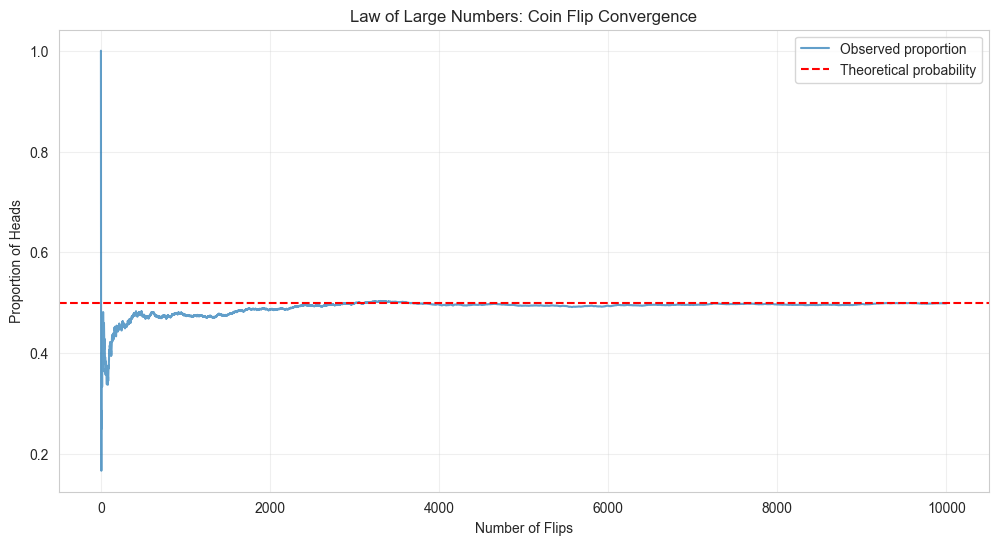

In [115]:
max_flips = 10000
flips = np.random.randint(0, 2, size=max_flips)

cumulative_heads = np.cumsum(flips)
trials = np.arange(1, max_flips + 1)
proportions = cumulative_heads / trials
plt.figure(figsize=(12, 6))
plt.plot(trials, proportions, alpha=0.7, label='Observed proportion')
plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical probability')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.title('Law of Large Numbers: Coin Flip Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 3. Dice Rolling

Let's simulate rolling a six-sided die and visualize the distribution.


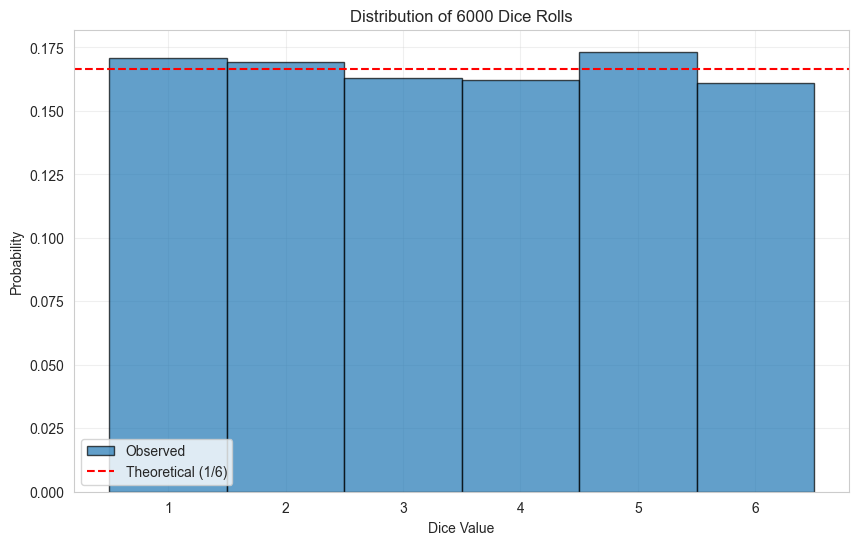

In [116]:
n_rolls = 6000
dice_rolls = np.random.randint(1, 7, size=n_rolls)

plt.figure(figsize=(10, 6))
plt.hist(dice_rolls, bins=np.arange(0.5, 7.5, 1), density=True, 
         alpha=0.7, edgecolor='black', label='Observed')
plt.axhline(y=1/6, color='r', linestyle='--', label='Theoretical (1/6)')
plt.xlabel('Dice Value')
plt.ylabel('Probability')
plt.title(f'Distribution of {n_rolls} Dice Rolls')
plt.xticks(range(1, 7))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 4. Normal Distribution

**Key properties:**
- Mean (μ): center of the distribution
- Standard deviation (σ): spread of the distribution
- Bell-shaped curve
- ~68% of data within 1σ, ~95% within 2σ, ~99.7% within 3σ


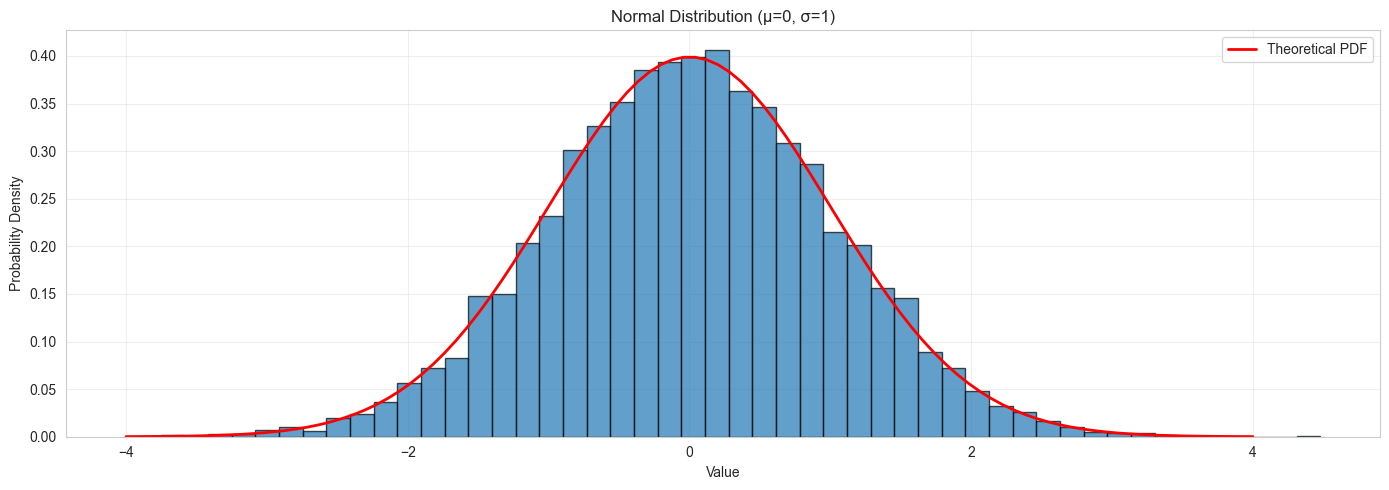

Sample mean: 0.012
Sample std: 1.000


In [117]:
mu, sigma, n = 0, 1, 10000
samples = np.random.normal(mu, sigma, n)

plt.figure(figsize=(14, 5))

plt.hist(samples, bins=50, density=True, alpha=0.7, edgecolor='black')
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Theoretical PDF')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution (μ=0, σ=1)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sample mean: {np.mean(samples):.3f}")
print(f"Sample std: {np.std(samples):.3f}")


## 5. Practice Exercises

1. Simulate 100 rolls of two dice and plot the distribution of their sum
2. Calculate the probability of getting a sum of 7
3. Generate samples from a normal distribution with μ=100 and σ=15 (like IQ scores)
4. What percentage of your samples fall between 85 and 115?


First 5 sums: [12 10  8  9  6]
Min sum: 2, Max sum: 12


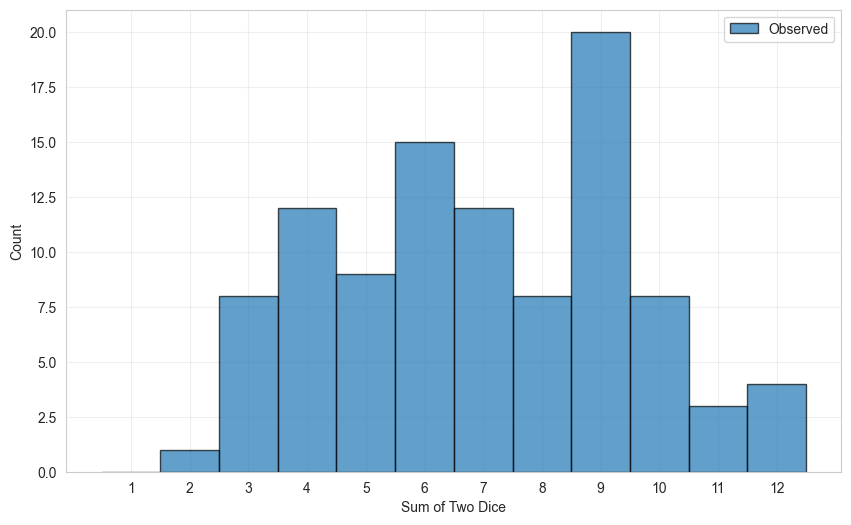

In [118]:
# 1

def create_dice_roll(n_rolls: float = 100):
    dice_rolls = np.random.randint(1, 7, size=n_rolls)
    return dice_rolls

dice1 = create_dice_roll()
dice2 = create_dice_roll()

sums = dice1 + dice2
print(f"First 5 sums: {sums[:5]}")
print(f"Min sum: {sums.min()}, Max sum: {sums.max()}")

plt.figure(figsize=(10, 6))
plt.hist(sums, bins=np.arange(0.5, 13.5, 1), density=False, 
         alpha=0.7, edgecolor='black', label='Observed')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Count')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [119]:
# 2
getting_7 = np.sum(sums == 7)
print(f"Probability of getting sum of 7: {getting_7 / len(sums)}")

Probability of getting sum of 7: 0.12


In [120]:
# 3
mu, sigma, n = 100, 15, 10000
samples = np.random.normal(mu, sigma, n)

print(f"Mean: {np.mean(samples):.2f}")
print(f"Std: {np.std(samples):.2f}")

Mean: 100.15
Std: 14.97


In [121]:
# 4
percentage = np.sum((samples >= 85) & (samples <= 115)) / len(samples) * 100
print(f"Percentage between 85 and 115: {percentage:.2f}%")

Percentage between 85 and 115: 68.32%
